# Growth of GDP with increase in Market Capital

In this notebook we will be deploying a model that estimates the growth percentage in GDP with the percentage increase or decrease in Market Capital. If financial indices are increasing while GDP and market capital are also rising, this may suggest a healthy, growing economy where the growth of the financial sector is supported by real economic activities. Conversely, if financial indices grow while GDP stagnates or grows slowly, it might suggest speculative growth, disconnected from the real economy, or other macroeconomic factors at play like monetary policy impacts.

**Importing necessary libraries**

In [50]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Loading the Data**

In [41]:
capitaldata = pd.read_excel(r'capital.xls')
gdpdata = pd.read_excel(r'gdp.xls')
print(capitaldata.head())
print(gdpdata.head())

                  Country Name  Unnamed: 1        1961        1962  \
0                        Aruba         NaN         NaN         NaN   
1  Africa Eastern and Southern         NaN         NaN         NaN   
2                  Afghanistan         NaN  42444500.0  40592100.0   
3   Africa Western and Central         NaN         NaN         NaN   
4                       Angola         NaN         NaN         NaN   

         1963        1964        1965        1966        1967        1968  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2  45547800.0  44619680.0  45434560.0  47114050.0  38528800.0  45589800.0   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   ...          2013          2014          2015          2016          2017  \
0  ...  6.531707e+08  6.803510e+08  

**Data Preprocessing**

Handling all the missing values and ensuring all data types are in float.

In [6]:
df2_melted = pd.melt(gdpdata, id_vars=['Country Name'], var_name='Year', value_name='Gdp')
df_melted = pd.melt(capitaldata, id_vars=['Country Name'], var_name='Year', value_name='Capital')
df2_melted['Gdp']=df2_melted.groupby('Country Name')['Gdp'].transform(lambda x: x.fillna(x.mean()))
df_melted['Capital'] = df_melted.groupby('Country Name')['Capital'].transform(lambda x: x.fillna(x.mean()))
df2_melted['Gdp'] = df2_melted['Gdp'].astype(float)
df_melted['Capital'] = df_melted['Capital'].astype(float)

We will be creating a new coloumn Percentage_Change(increase or decrease) in Market Capital for the year by using the value of the previous year and the current year.

In [42]:
df_melted['Percent_Change'] = df_melted.groupby('Country Name')['Capital'].pct_change() * 100
combined_df = pd.merge(df_melted[['Country Name','Year', 'Capital', 'Percent_Change']], 
                       df2_melted[['Country Name','Year', 'Gdp']], 
                       on=['Country Name', 'Year'], 
                       how='inner')
combined_df.dropna(inplace=True)
print(combined_df.head())

           Country Name  Year       Capital  Percent_Change       Gdp
0                 Aruba  1961  5.169938e+08        0.000000  3.728317
2           Afghanistan  1961  4.244450e+07      -98.148299  4.747960
4                Angola  1961  1.197313e+10        0.000000  3.397228
5               Albania  1961  2.112688e+09        0.000000  2.984581
8  United Arab Emirates  1961  3.000033e+10        0.000000  4.638126


C:\Users\mukesh\AppData\Local\Temp\ipykernel_2124\3222639289.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_melted['Percent_Change'] = df_melted.groupby('Country Name')['Capital'].pct_change() * 100


**Deploying the model**

Now we can start Feature Engeneering.

In [26]:
features = combined_df[['Percent_Change']]
target = combined_df['Gdp'] 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model=RandomForestRegressor(max_depth=4)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

We are going to create a function to take Country Name as input to make estimations.

In [30]:
def prepare_data_for_country():
    country = input("Enter the country for which you want to predict GDP changes: ")
    country_data = combined_df[combined_df['Country Name'] == country]
    print(country)
    return country_data

country_data = prepare_data_for_country()



India


**Analysis of Effects of GDP on financial indices**

Plotting GDP trend for the entered Country

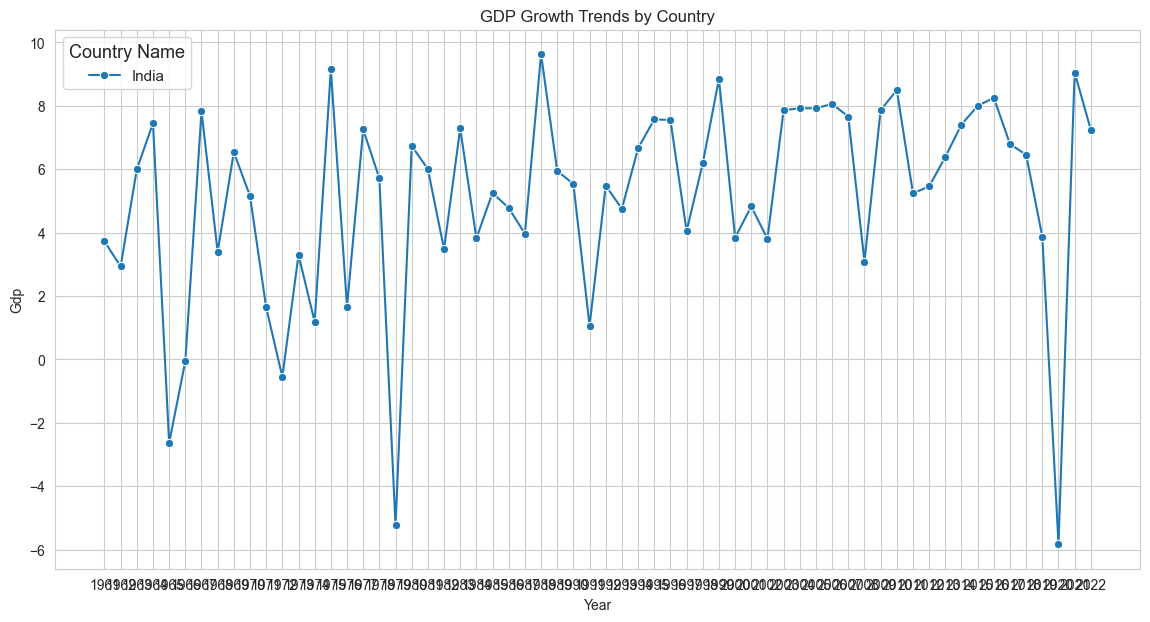

In [49]:
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Gdp', hue='Country Name', data=country_data, marker='o')
plt.title('GDP Growth Trends by Country')
plt.xlabel('Year')
plt.ylabel('Gdp')
plt.legend(title='Country Name', title_fontsize='13', fontsize='11')
plt.show()

GDP percentage mean above 0 indicates the Country has a positive Growth Rate while mean below 0 indicates the country has negative Growth Rate while mean equal to 0 indicates a steady Growth Rate.

In [60]:
print(df2_melted['Gdp'].describe())

count    16244.000000
mean         3.536899
std          5.310682
min        -64.047107
25%          1.617031
50%          3.657318
75%          5.641302
max        149.972963
Name: Gdp, dtype: float64


Plotting mean GDP of all Countries

In [62]:
mean_gdp_per_country = df2_melted.groupby('Country Name')['Gdp'].mean()
mean_gdp_per_country = mean_gdp_per_country.reset_index()
mean_gdp_per_country.columns = ['Country Name', 'Mean GDP']
print(mean_gdp_per_country)

                    Country Name  Mean GDP
0                    Afghanistan  4.747960
1    Africa Eastern and Southern  3.193582
2     Africa Western and Central  3.599904
3                        Albania  2.984581
4                        Algeria  3.541678
..                           ...       ...
257           West Bank and Gaza  4.412233
258                        World  3.475096
259                  Yemen, Rep.  1.861577
260                       Zambia  3.285841
261                     Zimbabwe  2.939011

[262 rows x 2 columns]


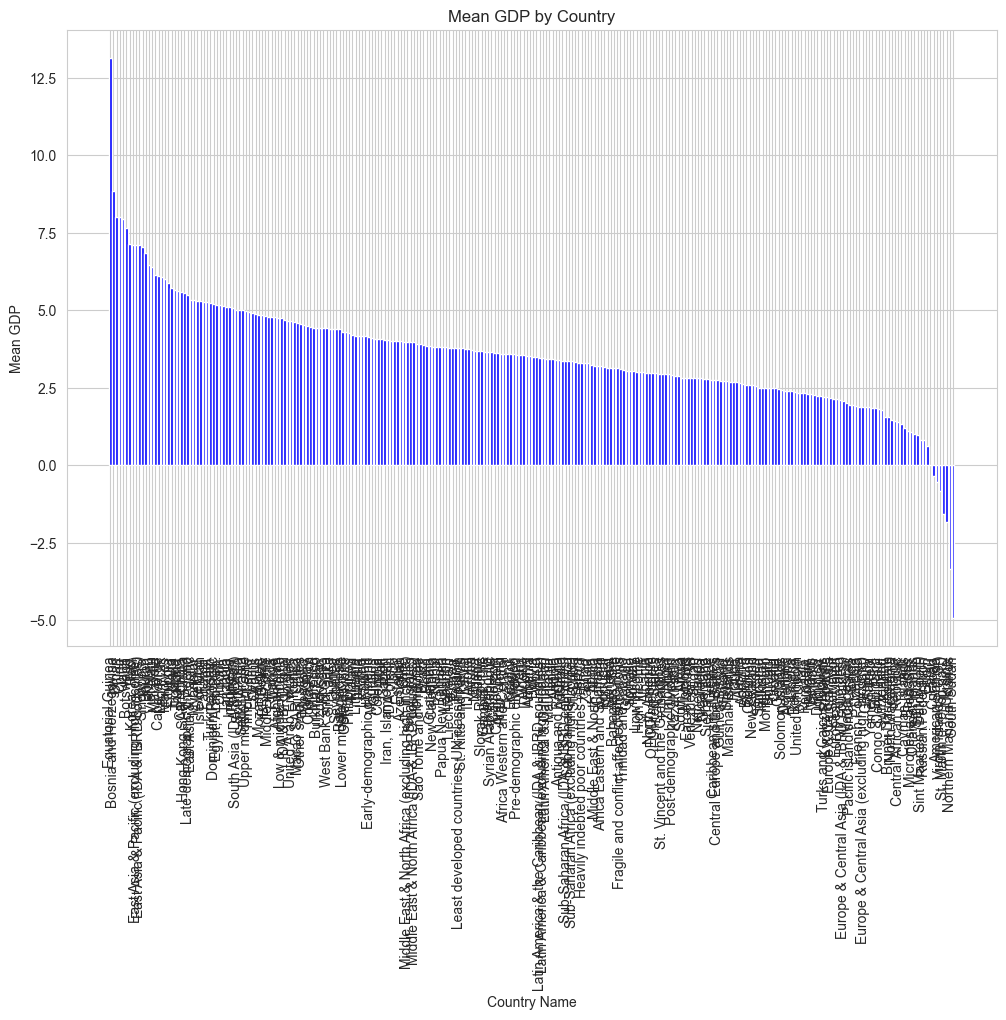

In [65]:
plt.figure(figsize=(12, 8))
plt.bar(mean_gdp_per_country['Country Name'], mean_gdp_per_country['Mean GDP'], color='blue')
plt.xlabel('Country Name')
plt.ylabel('Mean GDP')
plt.title('Mean GDP by Country')
plt.xticks(rotation=90) 
plt.show()

Plotting the relation of percentage GDP change with percentage Capital Increase or Decrease.

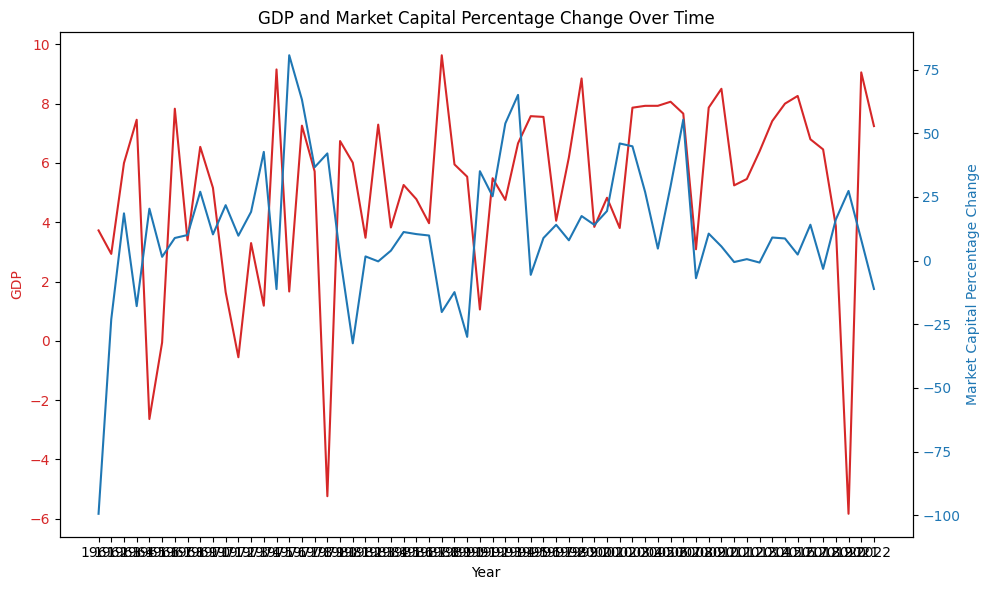

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color=color)
ax1.plot(country_data['Year'], country_data['Gdp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Market Capital Percentage Change', color=color)
ax2.plot(country_data['Year'], country_data['Percent_Change'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('GDP and Market Capital Percentage Change Over Time')
fig.tight_layout()  
plt.show()


Now we will take the new Capital of the country for which we want to predict the GDP and use the percentage change of the new capital to the preceeding capital to evaluate the GDP for that year.

In [39]:
def predict_gdp_change_with_new_capital():
    new_capital=float(input("Enter the new Capital"))
    last_capital = country_data['Capital'].iloc[-1]
    revenue_percentage_change = ((new_capital - last_capital) / last_capital) * 100
    predicted_gdp_change = model.predict([[revenue_percentage_change]])
    print("Capital Entered"+str(new_capital))
    if predicted_gdp_change>0:
        print("GDP is estimated to increase with Capital")
    else:
        print("GDP is estimated to decrease with Capital")
    print("estimated gdp is:")
    print(predicted_gdp_change[0])
    return 
predict_gdp_change_with_new_capital()

Capital Entered786543245765.13
GDP is estimated to increase with Capital
estimated gdp is:
4.486341772606015


c:\Users\mukesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
